In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

### The Kaggle file provides 4 folders: 
volcanoes_test ,  Volcanoes_test,  volcanoes_train,  Volcanoes_train

#### I check df.equals() on the training sets and they see, to be the exact same files

In [3]:
X = pd.read_csv('volcanoe-data/volcanoes_train/train_images.csv',header= None)

In [4]:
y = pd.read_csv('volcanoe-data/volcanoes_train/train_labels.csv')

#### The two y train sets seem to be exactly the same too. So, I will choose the lower case one

In [7]:
#X.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [17]:
#X.shape

(7000, 12100)

In [8]:
#y.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [18]:
#y.shape

(7000, 4)

**Lets check the balence of the classes before we split our data for training**

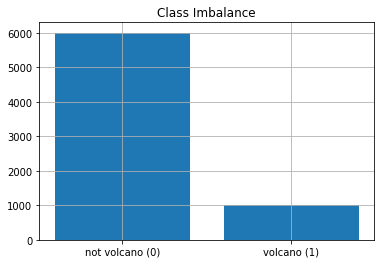

In [6]:
from src.volcano import class_imbalanced_plot
import matplotlib.pyplot as plt
class_imbalanced_plot(y)


**I will have to choose a technique for resampleing. there are sevrale ways to deal with imbalenced class:**
 - Augmentaion: create more minority class images by flipping, rotating, croping, or changing image quality of samples and saving as new samples
 - Under sampleing: by why throw out data - may cause over fitting
 - SMOTE: sintheticaly making more samples from minority class samples
 - weighting classes: (I read that this does work will woth image data)
 
**I Think what i wil do is try my model with both smoting and augmentation at some point. Firsti will go with smoteing becaseu for my spacific data set , al images are with the same exact resolutotion and croping.**

**Lets try making a few synthetic samples of volcano imahges and see who they looks**

**But first lets do a train test split**

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
#X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=666)

In [7]:
from src.volcano import volcano_images


In [11]:
import matplotlib.pyplot as plt



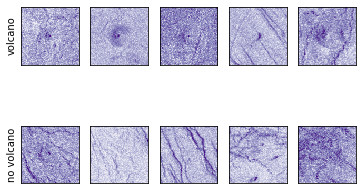

In [10]:
volcano_images(X,y)

**Lets try to get my X into the correct shape to feed into a CNN**

In [11]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape


In [6]:
import numpy as np
import pandas as pd

**Lets try this another way**

In [7]:


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout



In [8]:
Xtrain =  X/256
ytrain = y['Volcano?']


In [9]:
from sklearn.model_selection import train_test_split

In [9]:
img_rows, img_cols = 110, 110

X = Xtrain.values.reshape((-1, img_rows, img_cols, 1))
y = ytrain.values
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.2, random_state = 666)


#X_test = Xtest_raw.values.reshape((-1, img_rows, img_cols, 1))
#y_test = ytest_raw.values

In [10]:
modelCNN1 = Sequential()
modelCNN1.add(Conv2D(6, kernel_size = (3,3), activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
#modelCNN1.add(Conv2D(24, kernel_size = (3,3), activation = 'relu'))
#modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
#modelCNN1.add(Dropout(0.5))
modelCNN1.add(Flatten())
modelCNN1.add(Dense(12,activation = 'relu'))
modelCNN1.add(Dense(1, activation = 'sigmoid'))

In [17]:
modelCNN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 108, 6)       60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 52, 12)        660       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8112)              0

In [15]:
metrics1 = ['accuracy','TruePositives', 'TrueNegatives','FalsePositives','FalseNegatives','Precision','Recall']
metrics2 = ['Precision','Recall','accuracy']

In [16]:
modelCNN1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = metrics2)

In [20]:
#from tf.keras.callbacks import EarlyStopping
#callBack = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')

ModuleNotFoundError: No module named 'tf'

In [17]:
epochs =15
batch_size = 32

In [18]:
model3 = modelCNN1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_vali, y_vali)
                       )


Epoch 1/15
175/175 [==============================] - 12s 68ms/step - loss: 0.4191 - precision: 0.2500 - recall: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.6156 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
175/175 [==============================] - 13s 75ms/step - loss: 0.4055 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.5933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/15
175/175 [==============================] - 17s 99ms/step - loss: 0.3989 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.5898 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/15
175/175 [==============================] - 15s 88ms/step - loss: 0.3869 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.5615 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/

AttributeError: 'History' object has no attribute 'save'

In [19]:
modelCNN1.save("model3.h5")
print("Saved model to disk")

Saved model to disk


In [20]:
historyCNN1 = model3.history
with open('/trainHistory3Dict', 'wb') as file_pi:
        pickle.dump(history3, file_pi)

PermissionError: [Errno 13] Permission denied: '/trainHistory3Dict'

In [21]:
historyCNN1


{'loss': [0.41905152797698975,
  0.40545812249183655,
  0.39887067675590515,
  0.38691502809524536,
  0.362836629152298,
  0.32823315262794495,
  0.29639434814453125,
  0.28336769342422485,
  0.2713296711444855,
  0.25817856192588806,
  0.2538418173789978,
  0.2413940280675888,
  0.2438742071390152,
  0.23622149229049683,
  0.22638188302516937],
 'precision': [0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.8101266026496887,
  0.8232043981552124,
  0.7932692170143127,
  0.812889814376831,
  0.8150289058685303,
  0.8179959058761597,
  0.8246268630027771,
  0.8167259693145752],
 'recall': [0.00503144646063447,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.24150943756103516,
  0.3748427629470825,
  0.4150943458080292,
  0.4918239116668701,
  0.5320754647254944,
  0.5031446814537048,
  0.5559748411178589,
  0.5773584842681885],
 'accuracy': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_loss': [0.61555415391922,
  0.593301

''

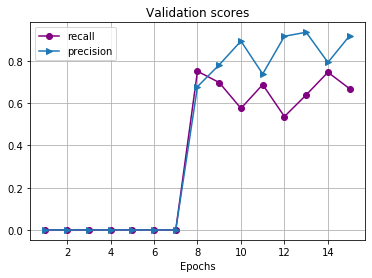

In [37]:
epochs = list(range(1,len(historyCNN1['loss'])+1))
#prec = history3['val_true_positives']/(history3['val_true_positives']+history3['val_false_positives'])
plt.plot(epochs,historyCNN1['val_recall'],'-o',label='recall',color='Purple')
plt.plot(epochs,historyCNN1['val_precision'],'->',label='precision')
#plt.plot(epochs,history3['val_true_negatives'],'-+',label='TN')
#plt.plot(epochs,history3['val_false_negatives'],'-s',label='FN')
plt.title('Validation scores')
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.savefig('images/CNN3_val_scores.png')
;

In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
from src.volcano import lr_plot

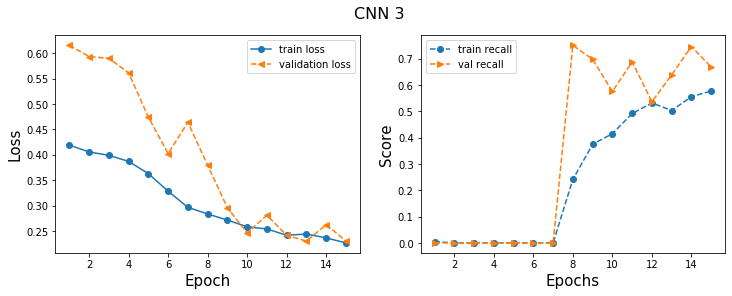

In [45]:
def lr_plot(model,model_name):
    ''' input : model , model_name : tf model, str'''
    history = model.history
    x_arr = np.arange(len(history['loss']))+1
    fig = plt.figure(figsize=(12,4))
    ax= fig.add_subplot(1,2,1)
    ax.plot(x_arr,history['loss'],'-o',label='train loss')
    ax.plot(x_arr,history['val_loss'],'--<',label='validation loss')
    ax.legend()
    ax.set_xlabel('Epoch',size=15)
    ax.set_ylabel('Loss',size=15)

    ax = fig.add_subplot(1,2,2)
    ax.plot(x_arr,history['recall'],'--o',label='train recall')
    ax.plot(x_arr,history['val_recall'],'-->',label='val recall')
    ax.legend()
    ax.set_xlabel('Epochs',size=15)
    ax.set_ylabel('Score',size=15)
    fig.suptitle(model_name,fontsize='16')
    plt.savefig('/home/rachel/Galvanize/capstone2/Cap2-repo/images/lr_plot_4.png')
lr_plot(model3,'CNN 3')


In [37]:
history.summary()

AttributeError: 'History' object has no attribute 'summary'

In [38]:
history


In [1]:
who


Interactive namespace is empty.


In [5]:
who


batch_size	 epochs	 
